<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [17]:
df_hitters = pd.read_csv("Hitters.csv")
df_hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [18]:
df_hitters.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)
df_hitters.columns

Index(['Name', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

# Prepare data

In [19]:
df_hitters.dropna(how='any', inplace = True)

# Build decision tree regression model

In [20]:
#import libraries
from sklearn.tree import DecisionTreeRegressor

X = df_hitters[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks',
       'PutOuts', 'Assists', 'Errors']]
y = df_hitters[['Salary']]

#fit regression model
regr = DecisionTreeRegressor(max_leaf_nodes=4, min_samples_leaf = 5)
fit_obj = regr.fit(X, y)

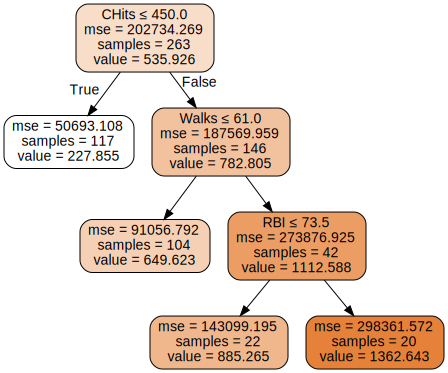

In [21]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(fit_obj, out_file = None,
                               feature_names = X.columns.values,
                               filled= True, rounded= True,
                               special_characters= True)
graph = graphviz.Source(dot_data)
graph

# Plot decision boundary in 3D

Text(0.5,0,'RBI')

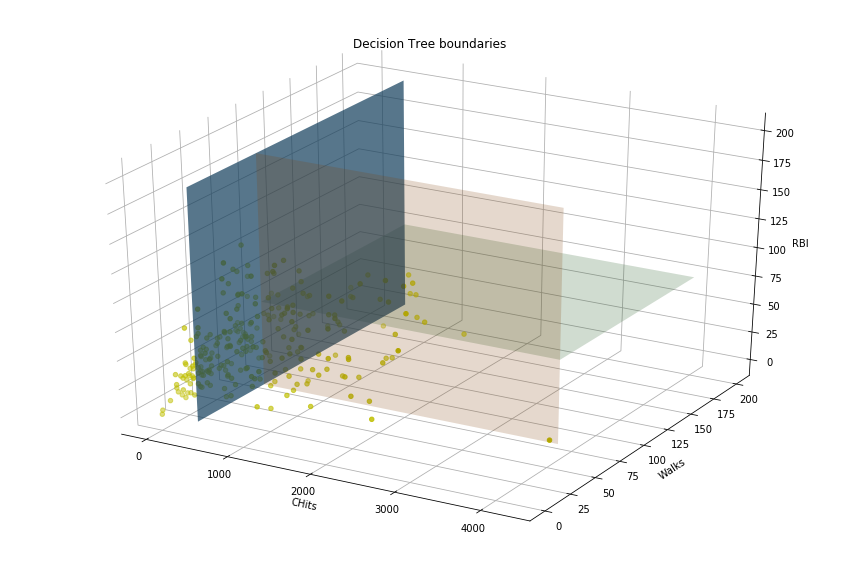

In [22]:
#plotting code

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.scatter(xs = df_hitters['CHits'], ys = df_hitters['Walks'], zs = df_hitters['RBI'],label = 'Training Data',c='y')

#decision boundry 1
yy, zz = np.meshgrid(range(2), range(2))
yy = yy*200
zz = zz*200
xx = np.full_like(yy,450)
ax.plot_surface(xx, yy, zz, alpha = 0.7, label='Decision Boundry CHits= 450')

#decision boundry 2
xx, zz = np.meshgrid(np.linspace(450,4000,2), range(2))
zz = zz*200
yy = np.full_like(xx,61)
ax.plot_surface(xx, yy, zz, alpha = 0.2, label='Decision Boundry CHits>= 450 and Walks=61')

#decision boundry 3
xx, yy = np.meshgrid(np.linspace(450,4000,2), np.linspace(61,200,2))
zz = np.full_like(xx,73.5)
ax.plot_surface(xx, yy, zz, alpha = 0.2, label='Decision Boundry CHits>= 450 and Walks=61 and RBI=73.5')


ax.set_title("Decision Tree boundaries")
ax.set_xlabel("CHits")
ax.set_ylabel("Walks")
ax.set_zlabel("RBI")
